In [694]:
import ugradio
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift, ifftshift
from scipy import signal as sig
from scipy.stats import norm

In [695]:
def extractData(filename):
    prefix = "ugastro\\Lab1Data\\"
    raw_data = np.load(prefix + filename)
    windowed_data = windowData(removeBuffer(raw_data['time_data']))
    return normalize(windowed_data)

def extractNoiseData(filename):
    prefix = "ugastro\\Lab1Data\\"
    raw_data = np.load(prefix + filename)
    windowed_data = windowData(removeNoiseBuffer(raw_data['time_data']))
    return noise_normalize(windowed_data)

def extractSDRData(filename):
    prefix = "ugastro\\Lab1Data\\"
    raw_data = np.load(prefix + filename)
    windowed_data = removeSSBBuffer(raw_data['time_data'])
    return sdr_normalize(windowed_data)

def removeBuffer(data):
    return data[1:][0]

def removeSSBBuffer(data):
    return data[:]

def removeNoiseBuffer(data):
    return data[1:]

def windowData(data):
    return data[:]

def normalize(data):
    return (data - np.mean(data))

def sdr_normalize(data):
    n = len(data)
    avg_r = 0
    avg_i = 0
    for i in range(n):
        avg_r += data[i][0]
        avg_i += data[i][1]
    avg_r /= n
    avg_i /= n
    for i in range(n):
        data[i][0] -= avg_r
        data[i][1] -= avg_i
    return data


def noise_normalize(data):
    return (data - np.mean(data)) / np.std(data)

In [696]:
# Consistent Plot Params
title = 16
axis = 13
yPower="Power Density (Arbitrary Scale)"
yVoltage="Measured Voltage / Counts (Arbitrary Scale)"
gSizeOne = (8, 6)

In [697]:
# Extracting Data
# 5.2
data_480_900 = extractData("Section5_2\\lab_1_data_480khz_900khz.npz")
data_480_950 = extractData("Section5_2\\lab_1_data_480khz_900khz.npz")
data_480_1000 = extractData("Section5_2\\lab_1_data_480khz_1000khz.npz")
data_480_1300 = extractData("Section5_2\\lab_1_data_480khz_1300khz.npz")
data_480_2000 = extractData("Section5_2\\lab_1_data_480khz_2000khz.npz")
data_480_3000 = extractData("Section5_2\\lab_1_data_480khz_3000khz.npz")
data_480_3100 = extractData("Section5_2\\lab_1_data_480khz_1000khz.npz")
data_1450_3100 = extractData("Section5_2\\lab_1_data_1450khz_3100khz.npz")

data_200_1000 = extractData("Section5_2\\lab_1_data_200khz_1000khz.npz")
data_200_1500 = extractData("Section5_2\\lab_1_data_200khz_1500khz.npz")
data_200_2000 = extractData("Section5_2\\lab_1_data_200khz_2000khz.npz")
data_200_3000 = extractData("Section5_2\\lab_1_data_200khz_3000khz.npz")

# 5.5
data_400_3100 = extractData("Section5_5\\lab_1_data_400khz_3100khz.npz")
data_401500_3100 = extractData("Section5_5\\lab_1_data_401500hz_3100khz.npz")
data_401750_3100 = extractData("Section5_5\\lab_1_data_401750hz_3100khz.npz")
data_402000_3100 = extractData("Section5_5\\lab_1_data_402000hz_3100khz.npz")
data_403000_3100 = extractData("Section5_5\\lab_1_data_403000hz_3100khz.npz")

# 5.6
data_400_1000 = extractData("Section5_6\\lab_1_data_400khz_1000khz.npz")
#data_1520_1000 = extractData("Section5_6\\lab_1_data_1520khz_1000khz.npz")
data_1600_1000 = extractData("Section5_6\\lab_1_data_1600khz_1000khz.npz")
data_1610_1000 = extractData("Section5_6\\lab_1_data_1610khz_1000khz.npz")
#data_1620_1000 = extractData("Section5_6\\lab_1_data_1620khz_1000khz.npz")
data_1980_1000 = extractData("Section5_6\\lab_1_data_1980khz_1000khz.npz")
#data_2480_1000 = extractData("Section5_6\\lab_1_data_2480khz_1000khz.npz")

# 5.7
data_noise_1000 = extractNoiseData("Section5_7\\lab_1_data_noise_1000khz.npz")
data_noise_2000 = extractNoiseData("Section5_7\\lab_1_data_noise_2000khz.npz")
data_noise_3000 = extractNoiseData("Section5_7\\lab_1_data_noise_3000khz.npz")
data_noise_3100_lowpass = extractNoiseData("Section5_7\\lab_1_data_noise_lowpass_3100khz.npz")

# 7.1
#data_400_420_2000 = extractData("Section7_1\\lab_1_data_400khz_420khz_2000khz.npz")
#data_400_420_2100 = extractData("Section7_1\\lab_1_data_400khz_420khz_2100khz.npz")
#data_400_420_2500 = extractData("Section7_1\\lab_1_data_400khz_420khz_2500khz.npz")
#data_400_420_3000 = extractData("Section7_1\\lab_1_data_400khz_420khz_3000khz.npz")
#data_400_420_3100 = extractData("Section7_1\\lab_1_data_400khz_420khz_3100khz.npz")
#data_400_380_2000 = extractData("Section7_1\\lab_1_data_400khz_380khz_2000khz.npz")
#data_400_380_2100 = extractData("Section7_1\\lab_1_data_400khz_380khz_2100khz.npz")
#data_400_380_2500 = extractData("Section7_1\\lab_1_data_400khz_380khz_2500khz.npz")
#data_400_380_3000 = extractData("Section7_1\\lab_1_data_400khz_380khz_3000khz.npz")
#data_400_380_3100 = extractData("Section7_1\\lab_1_data_400khz_380khz_3100khz.npz")
#data_200_210_3100 = extractData("Section7_1\\lab_1_data_200khz_210khz_3100khz.npz")
#data_200_190_3100 = extractData("Section7_1\\lab_1_data_200khz_190khz_3100khz.npz")
data_600_630_3100 = extractData("Section7_1\\lab_1_data_600khz_630khz_3100khz.npz")

# 7.3
data_DSB_imag_600_570_3100 = extractData("Section7_3\\lab_1_data_DSB_imag_600khz_570khz_3100khz.npz")
data_DSB_imag_600_630_3100 = extractData("Section7_3\\lab_1_data_DSB_imag_600khz_630khz_3100khz.npz")
data_DSB_real_600_570_3100 = extractData("Section7_3\\lab_1_data_DSB_real_600khz_570khz_3100khz.npz")
data_DSB_real_600_630_3100 = extractData("Section7_3\\lab_1_data_DSB_real_600khz_630khz_3100khz.npz")
data_SSB_imag_7062_6709_3100 = extractData("Section7_3\\lab_1_data_SSB_imag_7062khz_6709khz_3100khz.npz")
data_SSB_imag_7062_7415_3100 = extractData("Section7_3\\lab_1_data_SSB_imag_7062khz_7415khz_3100khz.npz")
data_SSB_real_7062_6709_3100 = extractData("Section7_3\\lab_1_data_SSB_real_7062khz_6709khz_3100khz.npz")
data_SSB_real_7062_7415_3100 = extractData("Section7_3\\lab_1_data_SSB_real_7062khz_7415khz_3100khz.npz")
data_SDR_3000_2880_3100 = extractData("Section7_3\\lab_1_data_SDR_3000khz_2880khz_3100khz.npz")
data_SDR_3000_3120_3100 = extractData("Section7_3\\lab_1_data_SDR_3000khz_3120khz_3100khz.npz")

times = windowData([i / 1e3 for i in range(0, 16384)])

In [698]:
def printDataBlocks(dataset):
    n = len(dataset)
    fig, axs = plt.subplots(1, n, figsize=(18, 6))

    for i in range(0, n):
        axs[i].plot(times, data_480_1000[i])
        axs[i].set_xlabel("Time (ms)")
        axs[i].set_ylabel("Measured Voltage / Counts")

    plt.tight_layout()
    plt.show()

In [699]:
def graphAllTimeData(datasets, labels, signal):
    n = len(datasets)
    fig, axs = plt.subplots(1, n, figsize=(25, 6))

    for i, data in enumerate(datasets):
        axs[i].plot(times, data, label=labels[i], alpha=1)
        axs[i].scatter(times, data, alpha=1)
        axs[i].grid(True, alpha=0.3)
        axs[i].set_xlabel("Time (ms)")
        axs[i].set_ylabel("Measured Voltage / Counts")
        axs[i].set_title(f"{signal} Signal w/ {labels[i]} Sample Rate")

    plt.tight_layout()
    plt.show()

In [700]:
def graphOverlayTimeData(datasets, labels, signal, xlim=None):
    plt.figure(figsize=gSizeOne)

    for i, data in enumerate(datasets):
        a = 0.5 if i == 0 else 1
        c = 'green' if i == 0 else 'red'
        data = noise_normalize(data)
        plt.plot(times, data, label=labels[i], alpha=a, color=c)
        plt.scatter(times, data, s=10, color=c)

    plt.xlabel("Time (ms)", fontsize=axis)
    plt.xlim(xlim)
    plt.ylabel(yVoltage, fontsize=axis)
    plt.title(f"{signal} Signals w/ 3 MHz Sample Rate", size=title)
    plt.grid(True, alpha=0.3)
    plt.show()

In [701]:
def graphAllPowerSpectra(datasets, sample_rates, labels, signal, xlim=None):
    n = len(datasets)
    fig, axs = plt.subplots(1, n, figsize=(25, 6))

    for i, data in enumerate(datasets):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        freq_bins = fftshift(fftfreq(len(times), d=1/sample_rates[i]))

        power_spectrum = abs(fft_data_shifted) ** 2

        axs[i].plot(freq_bins / 1e3, power_spectrum /1e5, label=f"{sample_rates[i]} kHz", alpha=1)        
        axs[i].set_xlabel("Frequency (kHz)")
        axs[i].set_ylabel("Power Spectral Density (10^5)")
        axs[i].set_title(f"FT of {signal} Signal w/ {labels[i]}", size=title)
        axs[i].grid(True, alpha=0.3)

    plt.xlim(xlim)
    plt.tight_layout()
    plt.show()

def graphOverlayPowerSpectra(datasets, sample_rates, labels, signal, multiple=True, xlim=None):
    plt.figure(figsize=gSizeOne)

    for i, data in enumerate(datasets):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        freq_bins = fftshift(fftfreq(len(times), d=1/sample_rates[i]))

        power_spectrum = abs(fft_data_shifted) ** 2
        plt.plot(freq_bins / 1e3, power_spectrum /1e5, label=f"{labels[i]}", alpha=1)

    plt.xlim(-1000, 1000)
    plt.xlabel("Frequency (kHz)", fontsize=axis)
    plt.ylabel(yPower, fontsize=axis)
    if not multiple:
        plt.title(f"Power Spectra of {signal} Signal w/ {labels[i]}", size=title)
    else:
        plt.title(f"Power Spectra of {signal} Signals Through Mixer", size=title)
    plt.legend()
    plt.xlim(xlim)
    plt.grid(True, alpha=0.3)
    plt.show()

def graphOverlayPowerSpectraOneSided(datasets, sample_rates, labels, signal, multiple=True, xlim=None):
    plt.figure(figsize=gSizeOne)
    mid = len(times) // 2

    for i, data in enumerate(datasets):
        a = 1 if i == 0 else 0.1
        factor = 1
        c = "red" if i == 0 else "blue"
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)[mid:]
        freq_bins = fftshift(fftfreq(len(data), d=1/sample_rates[i]))[mid:]
        #freq_bins = fftshift(fftfreq(len(times), d=1/sample_rates[i]))[mid:]


        power_spectrum = 2 * (abs(fft_data_shifted) ** 2)
        power_spectrum_db = 10 * np.log10(power_spectrum)
        #plt.plot(freq_bins / 1e3, power_spectrum/1e9, label=f"{labels[i]}", alpha=a)
        plt.plot(freq_bins / 1e3, power_spectrum / factor, label=f"{labels[i]}", alpha=1, color=c)

    plt.xlim(xlim)
    plt.xlabel("Frequency (kHz)", fontsize=axis)
    plt.ylabel(yPower, fontsize=axis)
    if not multiple:
        plt.title(f"One Sided Power Spectra of {signal} Signal w/ {labels[i]}", size=title)
    else:
        plt.title(f"One Sided Power Spectra of {signal} Signals", size=title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [702]:
def graphVoltageSpectra(datasets, sample_rates, labels, signal, multiple=True):
    fig, axs = plt.subplots(1, 2, figsize=(18, 8))

    for i, type in enumerate(["Real", "Imaginary"]):
        for j, data in enumerate(datasets):
            fft_data = fft(data)
            fft_data_shifted = fftshift(fft_data)
            freq_bins = fftshift(fftfreq(len(times), d=1/sample_rates[j]))

            if type == "Real":
                voltage_spectrum = fft_data_shifted.real
            else:
                voltage_spectrum = fft_data_shifted.imag

            axs[i].plot(freq_bins / 1e3, voltage_spectrum, label=f"{labels[j]}", alpha=1)
        axs[i].set_xlim(-600, 600)
        axs[i].set_xlabel("Frequency (kHz)")
        axs[i].set_ylabel("Voltage (mV)")
        if not multiple:
            axs[i].set_title(f"{type} Voltage Spectra of {signal} Signal w/ {labels[i]}", size=title)
        else:
            axs[i].set_title(f"{type} Voltage Spectra of {signal} Signal w/ Different Sample Rates", size=title)
        axs[i].legend()
        axs[i].grid(True, alpha=0.3)

    plt.show()

def graphOverlayVoltageSpectra(data, sample_rate, label, signal, xlim=None):
    plt.figure(figsize=gSizeOne)

    fft_data = fft(data)
    fft_data_shifted = fftshift(fft_data)
    freq_bins = fftshift(fftfreq(len(data), d=1/sample_rate))

    plt.plot(freq_bins / 1e3, abs(fft_data_shifted.real) / 1e4, label="Real Component", alpha=1, color="red")
    plt.plot(freq_bins / 1e3, fft_data_shifted.imag / 1e4, label="Imaginary Component", alpha=0.7, color="blue")

    plt.xlim(xlim)
    plt.xlabel("Frequency (kHz)", fontsize=axis)
    plt.ylabel("Voltage / Counts (Arbitrary Scale)", fontsize=axis)
    plt.title(f"Voltage Spectra of {signal} Signal at {label}", size=title)
    plt.legend()
    plt.grid(True)

    plt.show()

In [703]:
def graphInverseFTPowerSpectra(datasets, labels, signal):
    plt.figure(figsize=(12,8))

    for i, data in enumerate(datasets):
        fft_data = fft(data)

        power_spectrum = abs(fft_data) ** 2

        ifft_data = ifft(power_spectrum)
        ifft_data_shifted = ifftshift(ifft_data)
        
        plt.plot(times, ifft_data_shifted, label=f"{labels[i]}", alpha=1)
        
    plt.xlabel("Lag (?)")
    plt.ylabel("Autocorrelation (?)")
    plt.title(f"Inverse FT of {signal} Signal Power Spectra w/ Different Sample Rates", size=title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def graphInverseFTPowerSpectra2(datasets, labels, signal):
    plt.figure(figsize=(12,8))

    for i, data in enumerate(datasets):
        fft_data = fft(data)

        power_spectrum = (fft_data * np.conj(fft_data))

        ifft_data = ifft(power_spectrum)
        
        plt.plot(times, ifft_data, label=f"{labels[i]}", alpha=1)
        
    plt.xlabel("Lag (?)")
    plt.ylabel("Autocorrelation (?)")
    plt.title(f"Inverse FT of {signal} Signal Power Spectra (*Conjugate) w/ Different Sample Rates", size=title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def graphInverseFTPowerSpectraNumpy(datasets, labels, signal):
    plt.figure(figsize=(12,8))

    for i, data in enumerate(datasets):
        convolve_data = np.convolve(data, data[::-1], mode='same')
        
        plt.plot(times, convolve_data, label=f"{labels[i]}", alpha=1)
        
    plt.xlabel("Lag (?)")
    plt.ylabel("Autocorrelation (?)")
    plt.title(f"Inverse FT of {signal} Signal Power Spectra (Numpy) w/ Different Sample Rates", size=title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def graphInverseFTPowerSpectraNumpy2(datasets, labels, signal):
    plt.figure(figsize=(12,8))

    for i, data in enumerate(datasets):
        fft_data = np.fft.fft(data)
        fft_data_shifted = np.fft.fftshift(fft_data)

        power_spectrum = fft_data_shifted * np.conj(fft_data_shifted)

        ifft_data = np.fft.ifft(power_spectrum)
        ifft_data_shifted = np.fft.ifftshift(ifft_data)
        
        plt.plot(times, ifft_data_shifted, label=f"{labels[i]}", alpha=1)
        
    plt.xlabel("Lag (?)")
    plt.ylabel("Autocorrelation (?)")
    plt.title(f"Inverse FT of {signal} Signal Power Spectra (Numpy) w/ Different Sample Rates", size=title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [704]:
def graphACF(datasets, labels, signal, window=-1):
    plt.figure(figsize=(12, 8))

    for i, data in enumerate(datasets):
        data = data[:window]
        acf = sig.correlate(data, data, mode="same")

        step = times[1] - times[0]
        lags = np.arange(times[0], times[0] + len(acf) * step, step)

        plt.plot(lags, acf, label=f"{labels[i]}", alpha=1)
        
    plt.xlabel("Lag (ms)")
    plt.ylabel("Power per Hz (V^2/Hz)")
    plt.title(f"Windowed Autocorrelation of {signal} Signal w/ Different Sample Rates", size=title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def graphNumpyACF(datasets, labels, signal, window=-1):
    plt.figure(figsize=(12, 8))

    for i, data in enumerate(datasets):
        data = data[:window]
        acf = np.correlate(data, data, mode="same")

        step = times[1] - times[0]
        lags = np.arange(times[0], times[0] + len(acf) * step, step)

        plt.plot(lags, acf, label=f"{labels[i]}", alpha=1)
        
    plt.xlabel("Lag (ms)")
    plt.ylabel("Power per Hz (V^2/Hz)")
    plt.title(f"Autocorrelation of {signal} Signal w/ Different Sample Rates", size=title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [705]:
def compareACF(data, signal, sample, window=2048):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), width_ratios=[3, 1])

    data = data[:window]
    step = times[1] - times[0]
    time = times[:window]
    time_shifted = np.zeros(window)

    fft_data = fft(data)
    power_spectrum = abs(fft_data) ** 2
    ifft_data = ifft(power_spectrum)
    ifft_data_shifted = ifftshift(ifft_data) / 2e5


    axs[0].plot(time, ifft_data_shifted, label="w/ scipy fft()/ifft()", alpha=0.4, color='green')
    axs[1].plot(time, ifft_data_shifted, label="w/ scipy fft()/ifft()", alpha=0.4, color='green')

    acf = sig.correlate(data, data, mode="same") / 2e5
    #lags = np.arange(times[0], times[0] + len(acf) * step, step)    
    axs[0].plot(time, acf, label=f"w/ scipy correlate()", alpha=1, color='red')
    axs[1].plot(time, acf, label=f"w/ scipy correlate()", alpha=1, color='red')

    convolve_data = np.convolve(data, data[::-1], mode='same') / 2e5
    axs[0].plot(time, convolve_data, label="w/ numpy convolve()", alpha=0.6, color='blue')
    axs[1].plot(time, convolve_data, label="w/ numpy convolve()", alpha=0.6, color='blue')
   
    axs[0].set_xlabel("Lag (ms)", fontsize=axis)
    axs[0].set_ylabel("Power Density (Arbitrary Scale)", fontsize=axis)
    axs[0].legend()
    axs[0].grid(True)

    axs[1].set_xlabel("Lag (ms)", fontsize=axis)
    axs[1].set_ylabel("Power Density (Arbitrary Scale)", fontsize=axis)
    axs[1].legend()
    axs[1].grid(True)

    axs[0].set_title(f"IFT vs ACF of {signal} w/ {sample}", size=title)
    axs[1].set_title(f"Closeup of Top Center Peak", size=title)
    axs[1].set_xlim(-0.15, 0.15)
    axs[1].set_ylim(1, 1.4)

    plt.show()

In [706]:
def graphDFT(data, label, vsamp, rate_label, factor=0.5, xlim=None, ylim=None):
    fig, axs = plt.subplots(1, 2, figsize=(18, 8))

    #times = np.linspace(0, len(data)/vsamp, len(data))
    f_0 = fftshift(fftfreq(len(times), d=1/vsamp))
    freq_bins_low_res = np.arange(-vsamp/2, vsamp/2, vsamp//len(data))
    freq_bins_high_res = np.arange(-vsamp/2, vsamp/2, factor * vsamp//len(data))

    #f_0, dft_data_0 = ugradio.dft.dft(xt=data, t=times, f=freq_bins_low_res, vsamp=vsamp)
    #power_spectrum_0 = (abs(dft_data_0) ** 2)

    fft_data = fftshift(fft(data))
    power_spectrum_0 = 2 * (abs(fft_data) ** 2)
    power_spectrum_0_db = 10 * np.log10(power_spectrum_0)

    f_1, dft_data_1 = ugradio.dft.dft(xt=data, t=times, f=freq_bins_high_res, vsamp=vsamp)
    power_spectrum_1 = 2 * (abs(dft_data_1) ** 2)
    power_spectrum_1_db = 10 * np.log10(power_spectrum_1)

    axs[0].plot(f_0/1e3, power_spectrum_0_db, label=f"{rate_label}", alpha=1)
    axs[1].plot(f_1/1e3, power_spectrum_1_db, label=f"{rate_label}", alpha=1)

    axs[0].set_xlim(xlim)
    axs[0].set_ylim(ylim)
    axs[0].set_xlabel("Frequency (kHz)")
    axs[0].set_ylabel("Power Spectral Density (dB)")
    axs[0].set_title(f"FFT of {label} Signal w/ Normal Frequency Resolution", size=title)
    axs[0].legend()

    axs[1].set_xlim(xlim)
    axs[1].set_ylim(ylim)
    axs[1].set_xlabel("Frequency (kHz)")
    axs[1].set_ylabel("Power Spectral Density (dB)")
    axs[1].set_title(f"DFT of {label} Signal w/ Higher Frequency Resolution", size=title)
    axs[1].legend()

def graphOverlayDFT(data, label, vsamp, rate_label, factor=0.5, xlim=None, ylim=None):
    plt.figure(figsize=gSizeOne)

    # ENABLE WHEN RUNNING
    #times = np.linspace(0, len(data)/vsamp, len(data))
    
    f_0 = fftshift(fftfreq(len(times), d=1/vsamp))
    freq_bins_low_res = np.arange(-vsamp/2, vsamp/2, vsamp//len(data))
    freq_bins_high_res = np.arange(-vsamp/2, vsamp/2, factor * vsamp//len(data))

    #f_0, dft_data_0 = ugradio.dft.dft(xt=data, t=times, f=freq_bins_low_res, vsamp=vsamp)
    #power_spectrum_0 = (abs(dft_data_0) ** 2)

    fft_data = fftshift(fft(data))
    power_spectrum_0 = 2 * (abs(fft_data) ** 2)
    power_spectrum_0_db = 10 * np.log10(power_spectrum_0)

    f_1, dft_data_1 = ugradio.dft.dft(xt=data, t=times, f=freq_bins_high_res, vsamp=vsamp)
    power_spectrum_1 = 2 * (abs(dft_data_1) ** 2)
    power_spectrum_1_db = 10 * np.log10(power_spectrum_1)

    plt.plot(f_1/1e3, power_spectrum_1_db, label="DFT (Higher Resolution)", alpha=1)
    plt.plot(f_0/1e3, power_spectrum_0_db, label="FFT (Normal Resolution)", alpha=1)

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Frequency (kHz)", fontsize=axis)
    plt.ylabel("Power Spectral Density (dB)", fontsize=axis)
    plt.title(f"Power Spectra of {label} Signal at {rate_label}", size=title)
    plt.grid(True)
    plt.legend()

In [707]:
def graphFreqRes(datasets, sample_rate, sample, base, secondaries, num_samples):
    # Takes set of data of two close frequencies and plots their power spectra
    # Takes a full block and plots one row of 200 sample and another of all samples
    fig, axs = plt.subplots(2, len(datasets), figsize=(25, 12))

    for i, data in enumerate(datasets):
        mid = len(data) // 2
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)[mid:]

        freq_bins = fftshift(fftfreq(len(times), d=1/sample_rate))[mid:]

        power_spectrum = 2 * (abs(fft_data_shifted) ** 2)
        #power_spectrum_db = 10 * np.log10(power_spectrum)

        axs[0][i].plot(freq_bins / 1e3, power_spectrum, label=f"{sample}", alpha=1)

        axs[0][i].set_xlabel("Frequency (Hz)")
        axs[0][i].set_ylabel("Power (V^2)")
        axs[0][i].set_title(f"{base} & {secondaries[i]} Signals w/ 2048 Samples", size=title)
        axs[0][i].grid(True, alpha=0.3)
        axs[0][i].legend()
        axs[0][i].set_xlim(390, 415)

    for j, data in enumerate(datasets):
        window = data[:num_samples]
        mid = len(window) // 2
        fft_data = fft(window)
        fft_data_shifted = fftshift(fft_data)[mid:]

        freq_bins = fftshift(fftfreq(num_samples, d=1/sample_rate))[mid:]
        windowed_bins = freq_bins[:num_samples]
        
        power_spectrum = 2 * (abs(fft_data_shifted) ** 2)
        #power_spectrum_db = 10 * np.log10(power_spectrum)

        axs[1][j].plot(windowed_bins / 1e3, power_spectrum, label=f"{sample}", alpha=1)

        axs[1][j].set_xlabel("Frequency (Hz)")
        axs[1][j].set_ylabel("Power (V^2)")
        axs[1][j].set_title(f"{base} & {secondaries[j]} Signals w/ {num_samples} Samples", size=title)
        axs[1][j].grid(True, alpha=0.3)
        axs[1][j].legend()
        axs[1][j].set_xlim(390, 415)

    plt.show()

def graphFreqResOverlayed(datasets, sample_rate, sample, base, secondaries, num_samples):
    # Takes set of data of two close frequencies and plots their power spectra
    # Takes a full block and plots one row of 200 sample and another of all samples
    plt.figure(figsize=(gSizeOne))

    for i, data in enumerate(datasets):
        mid = len(data) // 2
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)[mid:]

        freq_bins = fftshift(fftfreq(2048, d=1/sample_rate))[mid:]

        power_spectrum = 2 * (abs(fft_data_shifted) ** 2)

        plt.plot(freq_bins / 1e3, power_spectrum / 3e9, label="2048 Samples", alpha=1)

        window = data[:num_samples]
        mid = len(window) // 2
        w_fft_data = fft(window)
        w_fft_data_shifted = fftshift(w_fft_data)[mid:]

        w_freq_bins = fftshift(fftfreq(num_samples, d=1/sample_rate))[mid:]
        windowed_bins = w_freq_bins[:num_samples]
        
        w_power_spectrum = 2 * (abs(w_fft_data_shifted) ** 2)

        plt.plot(windowed_bins / 1e3, w_power_spectrum / 0.9e9, label=f"{num_samples} Samples", alpha=1)

        plt.xlabel("Frequency (kHz)", fontsize=axis)
        plt.ylabel(yPower, fontsize=axis)
        plt.title(f"{base} & {secondaries[i]} Signals w/ {sample}", size=title)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.xlim(390, 415)

    plt.show()

In [708]:
def graphFourierFilter(data, sample_rate, label, signals, xlim=None):
    plt.figure(figsize=gSizeOne)

    fft_data = fft(data)
    fft_data_shifted = fftshift(fft_data)
    freq_bins = fftshift(fftfreq(len(data), d=1/sample_rate))

    real = fft_data_shifted.real
    imag = fft_data_shifted.imag

    ifft_data_real = ifft(ifftshift(real))
    ifft_data_imag = ifft(ifftshift(imag))


    plt.plot(freq_bins / 1e3, ifft_data_real, label="Real Only", alpha=1)
    plt.plot(freq_bins / 1e3, ifft_data_imag, label="Imaginary Only", alpha=1)
    plt.xlim(-600, 600)
    plt.xlabel("Frequency (kHz)", fontsize=axis)
    plt.ylabel(yVoltage, fontsize=axis)
    plt.title("Fourier Filter of {signals} Signal w/ {label}", size=title)
    plt.legend()
    plt.grid(True)

    plt.show()

def graphFourierFilter2(datasets, sample_rate, sample, labels, base, xlim=(0, 1500)):
    plt.figure(figsize=gSizeOne)
    noise_times = [i / 1e3 for i in range(0, len(datasets[0]))]
    print(len(datasets))

    for i, data in enumerate(datasets):
        fft_data = fft(data)
        freq_bins = ifftshift(fftfreq(len(data), d=1/sample_rate))

        ifft_data = ifftshift(ifft(fft_data))

        norm_data = noise_normalize(ifft_data)

        print(len(noise_times))
        print(len(norm_data))
        print(len(labels))
        
        plt.plot(noise_times, norm_data, alpha=1)

    plt.xlabel("Time (ms)", fontsize=axis)
    plt.xlim(xlim)
    plt.ylabel(yVoltage, fontsize=axis)
    plt.title(f"{base} Base Signal w/ LO signal at {sample}", size=title)
    plt.grid(True, alpha=0.3)
    plt.show()

In [709]:
def graphNyquistWindows(datasets, sample_rate, signals, windows, xlim=None):
    # sample_rate = (rate, label)
    fig, axs = plt.subplots(1, len(datasets), figsize=(25, 6))
    mid = len(times) // 2

    for i, data in enumerate(datasets):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)[mid:]
        freq_bins = fftshift(fftfreq(len(times), d=1/sample_rate[0]))[mid:]

        power_spectrum = 2 * (abs(fft_data_shifted) ** 2)
        #power_spectrum_db = 10 * np.log10(power_spectrum)

        axs[i].plot(freq_bins / 1e3, power_spectrum, label=f"{sample_rate[1]}", alpha=1)        
        axs[i].set_xlabel("Frequency (kHz)")
        axs[i].set_ylabel("Power Spectral Density (V^2 / Hz)")
        axs[i].set_title(f"Power Spectra of {signals[i]} Signal w/ {sample_rate[1]} ({windows[i]})", size=title)
        axs[i].grid(True, alpha=0.3)
        axs[i].set_xlim(xlim)
        axs[i].tick_params(axis='both', which='both', labelsize=10)

    plt.tight_layout()
    plt.show()

def graphOverlayNyquistWindows(datasets, sample_rate, sample, signals, xlim=None, ylim=None):
    # sample_rate = (rate, label)
    plt.figure(figsize=gSizeOne)

    for i, data in enumerate(datasets):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        freq_bins = fftshift(fftfreq(len(times), d=1/sample_rate))

        power_spectrum = 2 * (abs(fft_data_shifted) ** 2)

        if i == 0:
            plt.plot(freq_bins / 1e3, power_spectrum / 1.4e10, label=f"{signals[i]}", alpha=1)  
        else:
            plt.plot(freq_bins / 1e3, power_spectrum / 1.5e6, label=f"{signals[i]}", alpha=1)  
        print(max(power_spectrum)) 

    plt.xlabel("Frequency (kHz)", fontsize=axis)
    plt.ylabel(yPower, fontsize=axis)
    plt.title(f"Power Spectra of 1st and 4th Nyquist Window w/ {sample}", size=title)
    plt.grid(True)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [710]:
def graphGaussianHistogram(datasets, sample_rates, signals, num_bins):
    # Check block size first
    fig, axs = plt.subplots(1, len(datasets), figsize=(5*len(datasets), 6))

    for i, data in enumerate(datasets):
        bins = np.linspace(min(data), max(data), num_bins)
        axs[i].hist(data, bins=num_bins, density=True, alpha=1, label="Sampled Data")

        gaussian_fit = norm.pdf(bins, np.mean(data), np.std(data))
        axs[i].plot(bins, gaussian_fit, 'r--', linewidth=2, label="Gaussian Fit")

        axs[i].set_xlabel("Measured Voltage / Counts", fontsize=axis)
        axs[i].set_ylabel("Probability Density", fontsize=axis)
        axs[i].set_title(f"Noise of {signals[i]} Signal w/ {sample_rates[1]}", size=title)
        axs[i].legend()

    plt.tight_layout()
    plt.show()

def graphSingleGaussianHistogram(data, sample_rate, signals, num_bins):
    # Check block size first
    plt.figure(figsize=gSizeOne)

    bins = np.linspace(min(data), max(data), num_bins)
    plt.hist(data, bins=num_bins, density=True, alpha=1, label="Sampled Data")

    gaussian_fit = norm.pdf(bins, np.mean(data), np.std(data))
    plt.plot(bins, gaussian_fit, 'r--', linewidth=5, label="Gaussian Fit")

    plt.xlabel("Measured Voltage / Counts", fontsize=axis)
    plt.ylabel("Probability Density", fontsize=axis)
    plt.title(f"Noise of {signals} Signal w/ {sample_rate} & {num_bins} bins", size=title)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [711]:
def computeNoisePowerSpectra(data, sample_rate):
    mid = len(data) // 2
    fft_data = fftshift(fft(data))[mid:]
    freq_bins = fftshift(fftfreq(len(data), d=1/sample_rate))[mid:]

    power_spectrum = 2 * (abs(fft_data) ** 2)

    return freq_bins / 1e3, power_spectrum

def computeAvgPowerSpectra(dataset, sample_rate, sample, xlim=None):
    plt.figure(figsize=gSizeOne)

    num_blocks = len(dataset)
    spectra_avg = []

    for i, block in enumerate(dataset):
        if i in [1, 2, 4, 8, 16, 32, 48]:
            spectra_avg_db = 10 * np.log10(spectra_avg / i)
            plt.plot(freq_bins, spectra_avg_db, label=f"N={i}")
            #plt.plot(freq_bins, spectra_avg/i, label=f"N={i}")

        freq_bins, power_spectrum = computeNoisePowerSpectra(block, sample_rate)

        if i == 0:
            spectra_avg = power_spectrum
        else:
            spectra_avg += power_spectrum

    plt.xlim(xlim)
    plt.xlabel("Frequency (kHz)", fontsize=axis)
    plt.ylabel(yPower, fontsize=axis)
    plt.title(f"Average Power Spectra of Noise across 49 Blocks w/ {sample}", size=title)
    plt.legend()
    plt.grid(True)
    plt.show()


def computeNoiseMeanVariance(dataset, num_bins):
    fig, axs = plt.subplots(1, 2)
    means = []
    vars = []
    n = len(dataset)

    for i, block in enumerate(dataset):
        print(np.mean(block))
        print(np.var(block))

        means.append(np.mean(block))
        vars.append(np.var(block))

    axs[0].hist(means / n, bins=num_bins, density=True, alpha=1)
    axs[1].hist(vars, bins=num_bins, density=True, alpha=1)


    return

In [712]:

# sample_rates = [3.1e6, 3.1e6]
# labels = ["RF = 6.71 MHz", "RF = 7.42 MHz"]
# 
# datasets = [np.zeros(len(data_SSB_imag_7062_6709_3100))] * 2
# for i in range(len(data_SSB_imag_7062_6709_3100)):
#     datasets[1][i] = data_SSB_imag_7062_6709_3100[i] + data_SSB_real_7062_6709_3100[i]
#     datasets[0][i] = data_SSB_imag_7062_7415_3100[i] + data_SSB_real_7062_7415_3100[i]
# 
# 
# graphOverlayPowerSpectraOneSided(datasets, sample_rates, labels, "7.06 MHz LO & RF", multiple=True, xlim=(300, 400))
# 
# graphAllTimeData(datasets, labels, "7.06 MHz Base & RF")

In [713]:
# datasets = [data_DSB_real_600_570_3100, data_DSB_real_600_630_3100]
# sample_rates = [3.1e6, 3.1e6]
# labels = ["600 kHz and 570 kHz", "600 kHz and 630 kHz"]
# signal = "600 kHz Base and LO"
# graphOverlayPowerSpectraOneSided(datasets, sample_rates, labels, signal, xlim=(0, 100))
# 
# data_600_570_copy = data_DSB_real_600_570_3100.copy()
# data_600_630_copy = data_DSB_real_600_630_3100.copy()
# 
# data_600_570_fft = fft(data_600_570_copy)
# data_600_630_fft = fft(data_600_630_copy)
# 
# N = len(data_600_570_fft)
# mid = N // 2
# freqs = fftfreq(N, d=1/3.1e6)
# 
# low_cutoff = 0e3
# high_cutoff = 80e3
# bandpass_mask = (np.abs(freqs) >= low_cutoff) & (np.abs(freqs) <= high_cutoff)
# 
# #data_600_570_0 = data_600_570_fft[:mid] + np.zeros(mid)
# #data_600_630_0 = data_600_570_fft[:mid] + np.zeros(mid)
# 
# data_600_570_filtered = data_600_570_fft * bandpass_mask
# data_600_630_filtered = data_600_630_fft * bandpass_mask
# 
# data_600_570_ifft = ifft(data_600_570_filtered) 
# data_600_630_ifft = ifft(data_600_630_filtered)
# 
# datasets = [data_600_570_ifft, data_600_630_ifft]
# sample_rates = [3.1e6, 3.1e6]
# labels = ["600 kHz and 570 kHz", "600 kHz and 630 kHz"]
# signal = "600 kHz Base and LO"
# 
# graphOverlayPowerSpectraOneSided(datasets, sample_rates, labels, signal)
# 
# datasets = [ifftshift(data_600_570_ifft), ifftshift(data_600_630_ifft)]
# 
# graphOverlayPowerSpectraOneSided(datasets, sample_rates, labels, signal, xlim=(0, 90))
# 
# datasets = [data_DSB_real_600_570_3100, data_DSB_real_600_630_3100]
# sample_rates = [3.1e6, 3.1e6]
# labels = ["600 kHz and 570 kHz", "600 kHz and 630 kHz"]
# signal = "600 kHz LO and RF"

-0.21728515625


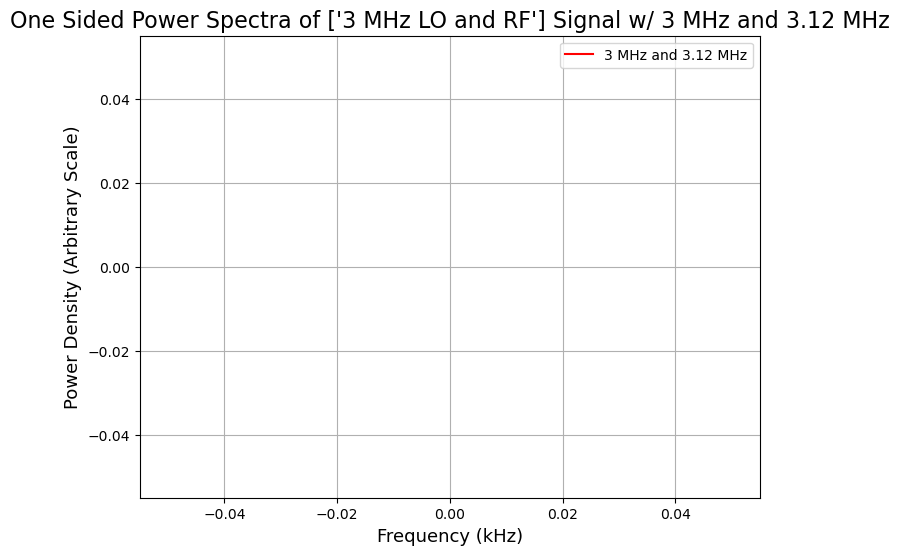

C:\Users\brand\AppData\Local\Temp\ipykernel_20728\2035985623.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  fft_1_s.real = fft_1_s
C:\Users\brand\AppData\Local\Temp\ipykernel_20728\2035985623.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  fft_1_s.imag = fft_2_s


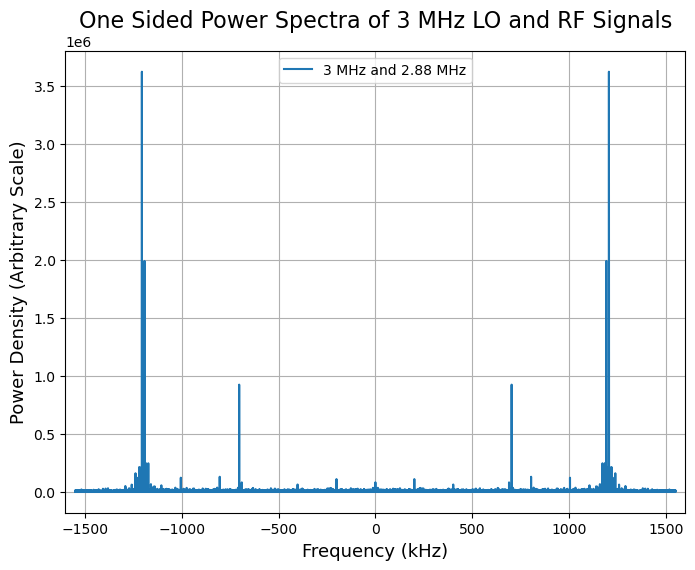

c:\Users\brand\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\brand\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\brand\anaconda3\Lib\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


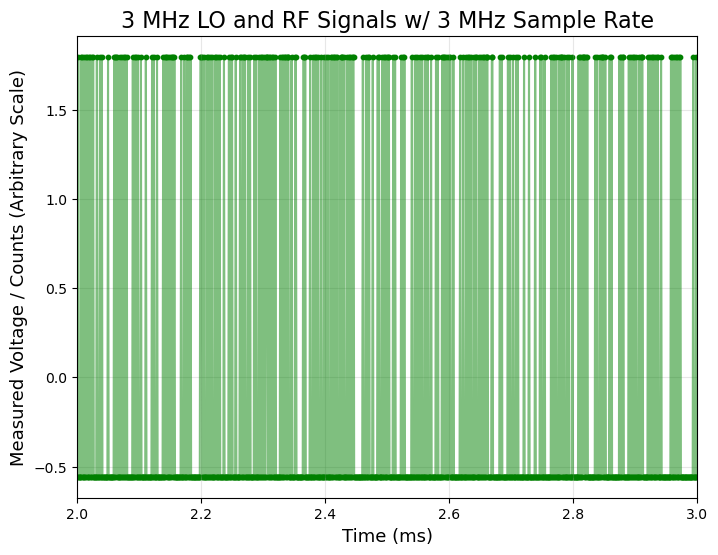

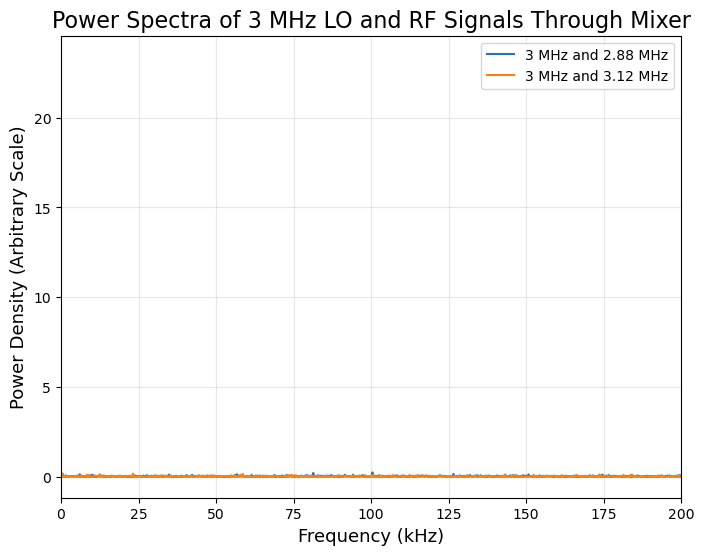

In [ ]:
N = len(data_SDR_3000_3120_3100)

print(data_SDR_3000_3120_3100[0][0])

#([data_SDR_3000_2880_3100], [3.1e6], ["3 MHz and 2.88 MHz"], ["3 MHz LO and RF"], multiple=False)
graphOverlayPowerSpectraOneSided([data_SDR_3000_3120_3100[0]], [3.1e6], ["3 MHz and 3.12 MHz"], ["3 MHz LO and RF"], multiple=False)

plt.figure(figsize=(gSizeOne))

datasets = [np.zeros(N, dtype=np.complex_), np.zeros(N, dtype=np.complex_)]
for i in range(N):
    datasets[0][i] = data_SDR_3000_2880_3100[i][0]
    datasets[1][i] = data_SDR_3000_2880_3100[i][1]

fft_1 = fft(datasets[0])
fft_2 = fft(datasets[1])

fft_1_s = fftshift(fft_1)
fft_2_s = fftshift(fft_2)

freq_bins = fftshift(fftfreq(len(datasets[0]), d=1/3.1e6))

fft_1_s.real = fft_1_s
fft_1_s.imag = fft_2_s

power_spectrum = 2 * (abs(fft_1_s) ** 2)

factor = 1
labels = ["Real", "Imaginary"]
plt.plot(freq_bins / 1e3, power_spectrum / factor, label=f"3 MHz and 2.88 MHz", alpha=1)
plt.xlim((0, 1600))
plt.xlabel("Frequency (kHz)", fontsize=axis)
plt.ylabel(yPower, fontsize=axis)
plt.title(f"One Sided Power Spectra of 3 MHz LO and RF Signals", size=title)
plt.legend()
plt.grid(True)
plt.show()

sample_rates = [3.1e6, 3.1e6]
labels = ["3 MHz and 2.88 MHz", "3 MHz and 3.12 MHz"]
signal = "3 MHz LO and RF"

graphOverlayTimeData([datasets[0]], labels, signal, xlim=(2, 3))
graphOverlayPowerSpectra(datasets, sample_rates, labels, signal, xlim=(0, 200))